In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [47]:
df = pd.read_excel('ENB2012_data.xlsx')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [48]:
df.columns = ['rel_compactness', 'suf_a', 'wall_a', 'roof_a', 'overall_h', 'orientation', 'glazing_a', 'glazing_a_dis', 'hl', 'cl']
df.head()

,rel_compactness,suf_a,wall_a,roof_a,overall_h,orientation,glazing_a,glazing_a_dis,hl,cl
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [49]:
df.shape

(768, 10)

In [50]:
df.isna().sum()    

rel_compactness    0
suf_a              0
wall_a             0
roof_a             0
overall_h          0
orientation        0
glazing_a          0
glazing_a_dis      0
hl                 0
cl                 0
dtype: int64

In [51]:
df.duplicated().value_counts()

False    768
Name: count, dtype: int64

In [52]:
def counts(column_name):
    print(df[column_name].value_counts())
for i in df.columns:
    counts(i)

rel_compactness
0.98    64
0.90    64
0.86    64
0.82    64
0.79    64
0.76    64
0.74    64
0.71    64
0.69    64
0.66    64
0.64    64
0.62    64
Name: count, dtype: int64
suf_a
514.5    64
563.5    64
588.0    64
612.5    64
637.0    64
661.5    64
686.0    64
710.5    64
735.0    64
759.5    64
784.0    64
808.5    64
Name: count, dtype: int64
wall_a
294.0    192
318.5    192
343.0    128
416.5     64
245.0     64
269.5     64
367.5     64
Name: count, dtype: int64
roof_a
220.50    384
147.00    192
122.50    128
110.25     64
Name: count, dtype: int64
overall_h
7.0    384
3.5    384
Name: count, dtype: int64
orientation
2    192
3    192
4    192
5    192
Name: count, dtype: int64
glazing_a
0.10    240
0.25    240
0.40    240
0.00     48
Name: count, dtype: int64
glazing_a_dis
1    144
2    144
3    144
4    144
5    144
0     48
Name: count, dtype: int64
hl
15.16    6
13.00    5
15.23    4
28.15    4
14.60    4
        ..
33.21    1
36.77    1
36.71    1
37.03    1
16.64    1
Nam

In [53]:
df.corr()

,rel_compactness,suf_a,wall_a,roof_a,overall_h,orientation,glazing_a,glazing_a_dis,hl,cl
rel_compactness,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
suf_a,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
wall_a,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
roof_a,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
overall_h,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889430,0.895785
orientation,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
glazing_a,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269842,0.207505
glazing_a_dis,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
hl,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862
cl,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


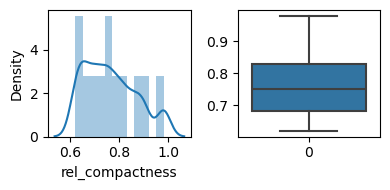

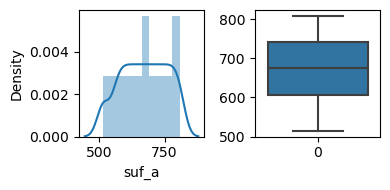

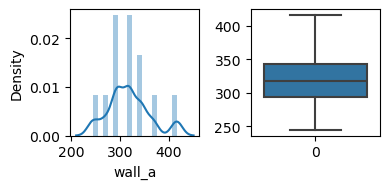

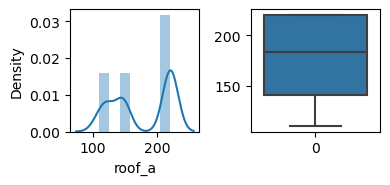

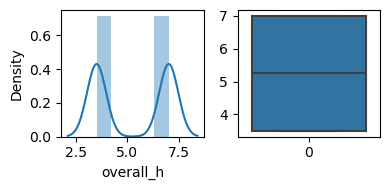

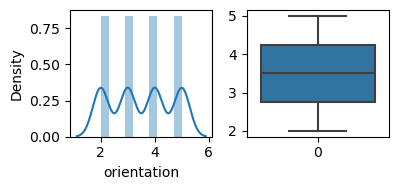

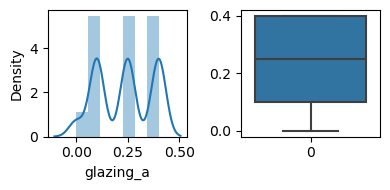

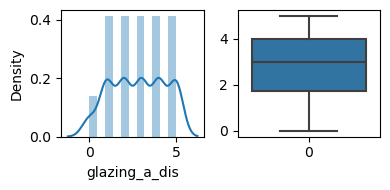

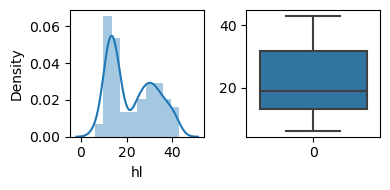

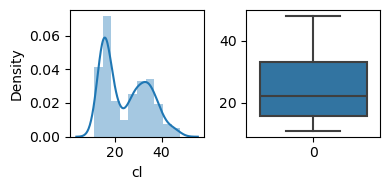

In [54]:
for j in df.columns:
    plt.figure(figsize=(4,2))
    plt.subplot(1,2,1)
    sns.distplot(df[j])
    plt.subplot(1,2,2)
    sns.boxplot(df[j])
    plt.tight_layout()
    plt.show()

In [55]:
from sklearn.model_selection import train_test_split
X = df.drop(['hl'], axis=1)
y = df['hl']
X = np.vstack((np.ones((X.shape[0], )), X.T)).T
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [56]:
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

In [57]:
def model(X, y, learning_rate, iter):
    m = y.size
    theta = np.zeros((X.shape[1], 1))
    
    cost_list = []
    for i in range(iter):
        
        y_pred = np.dot(X, theta)
        
        cost = (1/(2*m))*(np.sum(np.square(y_pred-y)))
        
        d_theta = (1/m)*np.dot(X.T, (y_pred-y))
        
        theta = theta - learning_rate*d_theta
        
        cost_list.append(cost)
        
        if (i+1)%10000 == 0:
            print("Iteration = {}, Cost = {}".format(i+1, cost))
    return theta, cost_list

In [58]:
iterations = 100000
learning_rate = 0.000003
theta, cost_list = model(X_train, y_train, learning_rate, iterations)

Iteration = 10000, Cost = 3.690491816698769
Iteration = 20000, Cost = 2.3038660191242477
Iteration = 30000, Cost = 2.152164311579468
Iteration = 40000, Cost = 2.1296202716658716
Iteration = 50000, Cost = 2.1212502363431036
Iteration = 60000, Cost = 2.1150156739530077
Iteration = 70000, Cost = 2.10958472914964
Iteration = 80000, Cost = 2.104748123632103
Iteration = 90000, Cost = 2.10042214726736
Iteration = 100000, Cost = 2.0965439277319553


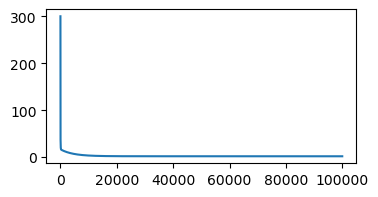

In [59]:
plt.figure(figsize = (4,2))
plt.plot(np.arange(0, iterations), cost_list)
plt.show()

In [60]:
y_pred = np.dot(X_test, theta)
cost = (1/(2*(y.size)))*(np.sum(np.square(y_pred-y_test)))
cost

0.46041945544036467

In [61]:
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
ml_models = [LinearRegression(), Ridge(), Lasso()]

In [62]:
for model in ml_models:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

In [63]:
print('Manual model:')
print('R2_score:', r2_score(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', root_mean_squared_error(y_test, y_pred), '\n')
def score(model):
    print(model,':')
    print('R2_score:', r2_score(y_test, preds))
    print('MSE:', mean_squared_error(y_test, preds))
    print('RMSE:', root_mean_squared_error(y_test, preds), '\n')
for i in ml_models:
    score(i)

Manual model:
R2_score: 0.9550278870160224
MSE: 4.5922356075090915
RMSE: 2.1429502111596275 

LinearRegression() :
R2_score: 0.9531282056331118
MSE: 4.786217697979951
RMSE: 2.187742603228257 

Ridge() :
R2_score: 0.9531282056331118
MSE: 4.786217697979951
RMSE: 2.187742603228257 

Lasso() :
R2_score: 0.9531282056331118
MSE: 4.786217697979951
RMSE: 2.187742603228257 



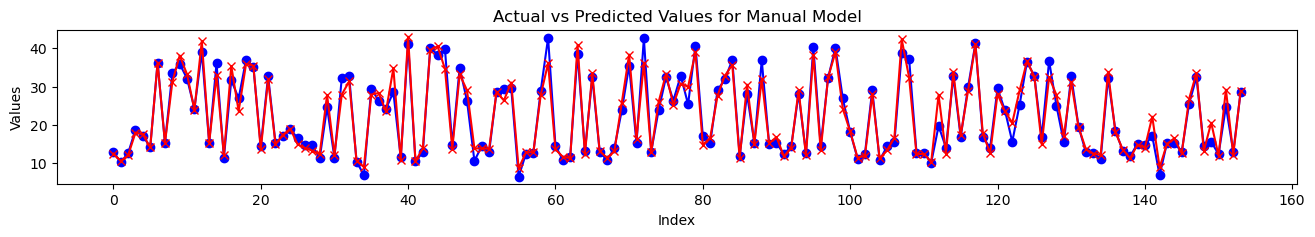

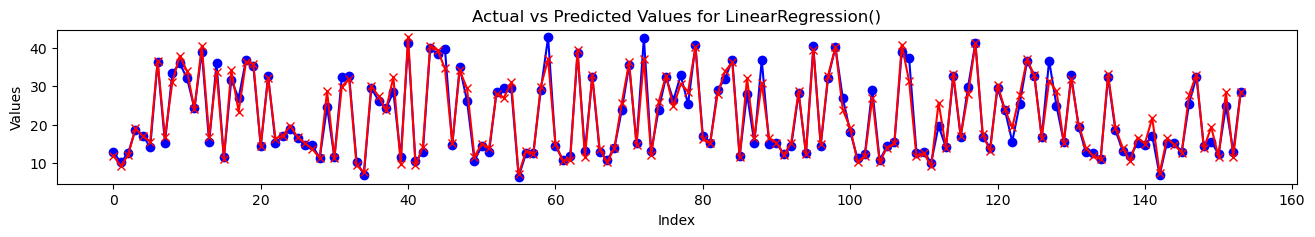

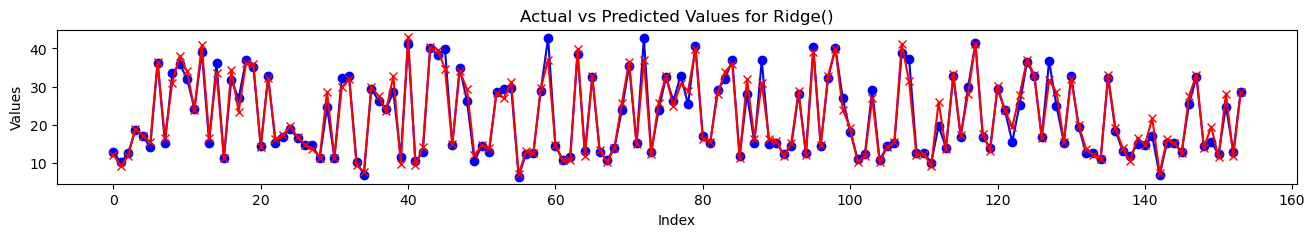

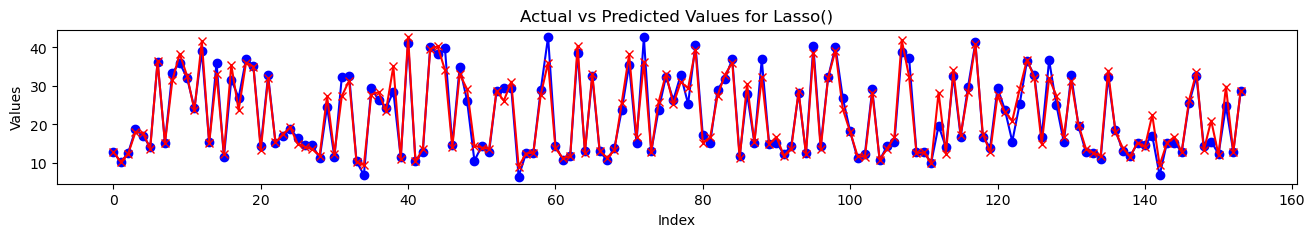

In [64]:
plt.figure(figsize=(16,2))

plt.plot(range(len(y_test)), y_test, marker='o', label="Actual Values", color="blue")
plt.plot(range(len(y_pred)), y_pred, marker='x', label="Predicted Values", color="red")

plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Actual vs Predicted Values for Manual Model")

plt.show()

for model in ml_models:
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    plt.figure(figsize=(16,2))
    
    plt.plot(range(len(y_test)), y_test, marker='o', label="Actual Values", color="blue")
    plt.plot(range(len(preds)), preds, marker='x', label="Predicted Values", color="red")
    
    plt.xlabel("Index")
    plt.ylabel("Values")
    plt.title("Actual vs Predicted Values for {}".format(model) )
    
    plt.show()

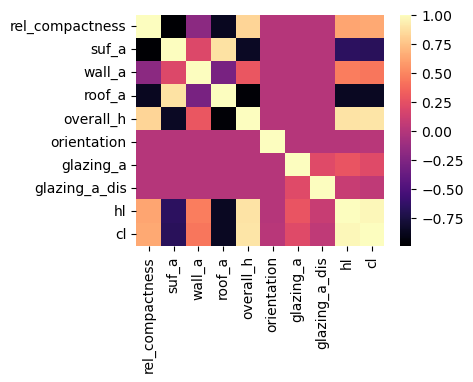

In [65]:
plt.figure(figsize=(4,3)) 
sns.heatmap(df.corr(), cmap="magma")  
plt.show()

**We can observe from the heatmap that Relative compactness, Wall area, Overall Height and Glazing area have a significant impact on the Heating load.**


<Figure size 100x100 with 0 Axes>

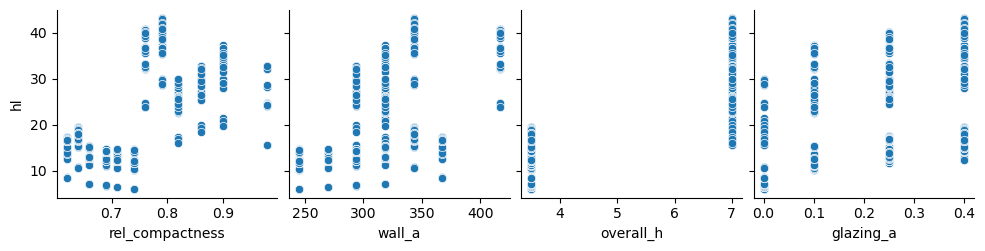

In [66]:
plt.figure(figsize=(1,1))
sns.pairplot(df, x_vars=['rel_compactness', 'wall_a', 'overall_h', 'glazing_a'], y_vars='hl')
plt.show()

In [67]:
sorted_df = df.sort_values(by = 'hl', ascending = True)
filtered_df = sorted_df[sorted_df['hl'] < 7]
filtered_df

,rel_compactness,suf_a,wall_a,roof_a,overall_h,orientation,glazing_a,glazing_a_dis,hl,cl
26,0.74,686.0,245.0,220.5,3.5,4,0.0,0,6.010,10.94
27,0.74,686.0,245.0,220.5,3.5,5,0.0,0,6.040,11.17
25,0.74,686.0,245.0,220.5,3.5,3,0.0,0,6.050,11.19
24,0.74,686.0,245.0,220.5,3.5,2,0.0,0,6.070,10.90
30,0.71,710.5,269.5,220.5,3.5,4,0.0,0,6.366,11.29
28,0.71,710.5,269.5,220.5,3.5,2,0.0,0,6.370,11.27
29,0.71,710.5,269.5,220.5,3.5,3,0.0,0,6.400,11.72
31,0.71,710.5,269.5,220.5,3.5,5,0.0,0,6.400,11.67
34,0.69,735.0,294.0,220.5,3.5,4,0.0,0,6.770,11.73
33,0.69,735.0,294.0,220.5,3.5,3,0.0,0,6.790,12.05


Here we can find that ***Relative Compactness = 0.74, Wall Area = 245.0, Overall Height = 3.5 and Glazing Area = 0.0*** provide minimum heating load.
Also Relative Compactness and Wall Area are inversely proportional with the Overall Height and Glazing Area constant at 3.5 and 0.0 respectively for minimum load.